<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML311Coursera747-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# Machine Learning Foundation

## Course 5, Part d: Keras Intro LAB


## Using Keras to Build and Train Neural Networks


In this exercise we will use a <strong>neural network</strong> to predict diabetes using the <strong>Pima Diabetes Dataset</strong>.  We will start by training a <strong>Random Forest</strong> to get a performance baseline.  

Then we will use the Keras package to quickly build and train a neural network and compare the performance.  

We will see how different network structures affect the performance, training time, and level of overfitting (or underfitting).

## UCI Pima Diabetes Dataset

* UCI ML Repositiory (http://archive.ics.uci.edu/ml/datasets/Pima+Indians+Diabetes)


### Attributes: (all numeric-valued)
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)


The UCI Pima Diabetes Dataset which has 8 numerical predictors and a binary outcome.


In [1]:
#Setup
import warnings
# import skillsnetwork

warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, accuracy_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
!pip install --upgrade numpy

Defaulting to user installation because normal site-packages is not writeable


In [4]:
## Import Keras objects for Deep Learning
from keras.models  import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from keras.optimizers import Adam, SGD, RMSprop

In [5]:
## Load in the data set 
# await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/labs/Module2/L2/diabetes.csv", overwrite=True)

names = ["times_pregnant", "glucose_tolerance_test", "blood_pressure", "skin_thickness", "insulin", 
         "bmi", "pedigree_function", "age", "has_diabetes"]
diabetes_df = pd.read_csv('./diabetes.csv', names=names, header=0)

In [7]:
print(diabetes_df.shape)
diabetes_df.sample(5)

(768, 9)


,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
39,4,111,72,47,207,37.1,1.390,56,1
22,7,196,90,0,0,39.8,0.451,41,1
749,6,162,62,0,0,24.3,0.178,50,1
168,4,110,66,0,0,31.9,0.471,29,0
532,1,86,66,52,65,41.3,0.917,29,0


In [8]:
diabetes_df.tail()

,times_pregnant,glucose_tolerance_test,blood_pressure,skin_thickness,insulin,bmi,pedigree_function,age,has_diabetes
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


The first colon ':' means to select all rows, and :-1 means to select all columns up to, but not including, the last column. 
So effectively, it selects all columns except for the last one.

y = This column typically contains the target variable or the outcome you want to predict.
X = These columns typically represent the features or independent variables used to make predictions.

In [9]:
X = diabetes_df.iloc[:, :-1].values
y = diabetes_df["has_diabetes"].values

In [11]:
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [12]:
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [13]:
# Split the data to Train, and Test (75%, 25%)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11111)

By setting a specific random state value, such as 11111, you're essentially fixing the random seed. This means that even though there's randomness involved, the results will be deterministic and reproducible across different runs of the code. This can be useful for debugging, testing, and comparing different models or parameter settings.

np.mean(y): This calculates the mean of the y array. In a binary classification scenario, where y contains binary labels (0s and 1s), np.mean(y) calculates the proportion of 1s in the y array. This effectively gives you the proportion of positive samples in your dataset.

np.mean(1-y): This calculates the mean of the array resulting from 1-y. Since y contains binary labels, subtracting y from 1 will flip the labels, turning 1s into 0s and 0s into 1s. Therefore, np.mean(1-y) calculates the proportion of 0s in the y array, which corresponds to the proportion of negative samples in your dataset.

In [14]:
np.mean(y), np.mean(1-y)

(0.3489583333333333, 0.6510416666666666)

Above, we see that about 35% of the patients in this dataset have diabetes, while 65% do not.  This means we can get an accuracy of 65% without any model - just declare that no one has diabetes. We will calculate the <strong>ROC-AUC</strong> score to evaluate performance of our model, and also look at the accuracy as well to see if we improved upon the 65% accuracy.
## Exercise 1: Get a baseline performance using Random Forest
To begin, and get a baseline for classifier performance:
1. Train a Random Forest model with 200 trees on the training data.
2. Calculate the accuracy and roc_auc_score of the predictions.


In [16]:
## Train the RF Model
rf_model = RandomForestClassifier(n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200)

roc_auc_score is defined as the area under the ROC curve, which is the curve having False Positive Rate on the x-axis and True Positive Rate on the y-axis at all classification thresholds.

Calculates the Receiver Operating Characteristic - Area Under Curve (ROC-AUC) score for a binary classification model. 

Components of the code:
roc_auc_score(y_test, y_pred_prob_rf[:, 1]): This function calculates the ROC-AUC score. It takes two main arguments:
1. y_test: This is the true labels or ground truth for the test set.

2. y_pred_prob_rf[:, 1]: This represents the predicted probabilities of the positive class (usually denoted as class 1) generated by the model. 
y_pred_prob_rf is the predicted probabilities returned by the model, and [:, 1] is used to select the probabilities for the positive class only. 
This assumes that the model's prediction output is in the form of predicted probabilities for each class, and [:, 1] specifically selects the probabilities for the positive class.

print('roc-auc is {:.3f}'.format(roc_auc_score(y_test, y_pred_prob_rf[:, 1]))): This line of code prints the ROC-AUC score with three decimal places. It uses string formatting to insert the calculated ROC-AUC score into the string 'roc-auc is {:.3f}'.

The [:, 1] notation is used for array indexing in Python, particularly with NumPy arrays. 

Each part means:
[:, 1]:
The first colon : before the comma indicates that you want to select all rows of the array.

The number 1 after the comma indicates that you want to select the second column of the array (remembering that indexing starts from 0 in Python).



So, [:, 1] selects all rows of the array but only the values from the second column.

In [18]:
# Make predictions on the test set - both "hard" predictions, and the scores (percent of trees voting yes)
y_pred_class_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)

print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_rf)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_rf[:,1])))

accuracy is 0.766
roc-auc is 0.825


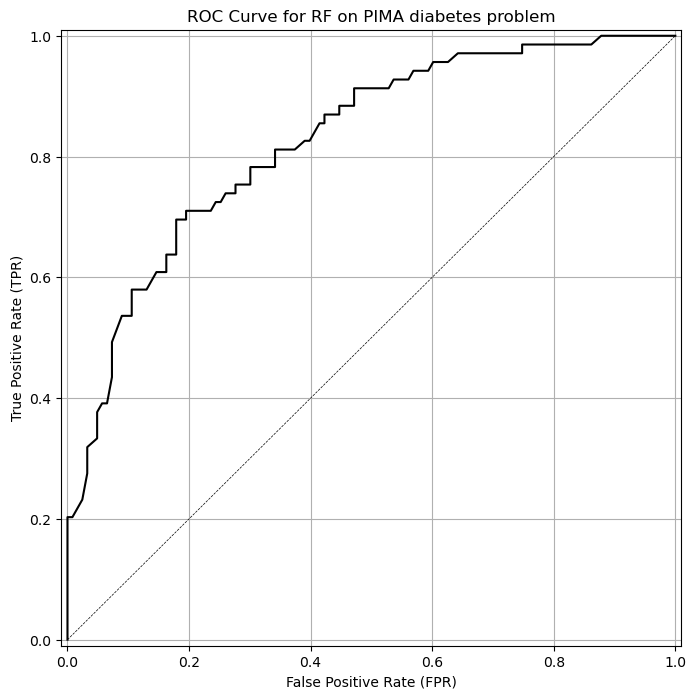

In [29]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name), xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')
plot_roc(y_test, y_pred_prob_rf[:, 1], 'RF')
plt.show() #without this graph is not visible

## Build a Single Hidden Layer Neural Network

We will use the Sequential model to quickly build a neural network.  Our first network will be a single layer network.  We have 8 variables, so we set the input shape to 8.  Let's start by having a single hidden layer with 12 nodes.


In [33]:
## First let's normalize the data - This aids the training of neural nets by providing numerical stability
## Random Forest does not need this as it finds a split only, as opposed to performing matrix multiplications

normalizer = StandardScaler()
X_train_norm = normalizer.fit_transform(X_train)
X_test_norm = normalizer.transform(X_test)

In [37]:
# Define the Model 
# Input size is 8-dimensional (8 variables)
# 1 hidden layer, 12 hidden nodes, sigmoid activation
# Final layer has just one node with a sigmoid activation (standard for binary classification output needs to be in between 0  1)

model_1 = Sequential()
model_1.add(Dense(12,input_shape = (8,),activation = 'sigmoid'))
model_1.add(Dense(1,activation='sigmoid'))

In [38]:
#  This is a nice tool to view the model you have created and count the parameters

model_1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 12)                108       
                                                                 
 dense_9 (Dense)             (None, 1)                 13        
                                                                 
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


### Comprehension question:
Why do we have 121 parameters?  Does that make sense?

Let's fit our model for 200 epochs.

An epoch is when all the training data is used at once and is defined as the total number of iterations of all the training data in one cycle for training the machine learning model. Another way to define an epoch is the number of passes a training dataset takes around an algorithm.

SGD = optimizer

In [39]:
# Fit(Train) the Model

# Compile the model with Optimizer, Loss Function and Metrics
# Roc-Auc is not available in Keras as an off the shelf metric yet, so we will skip it here.

model_1.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_1 = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=200)
# the fit function returns the run history. 
# It is very convenient, as it contains information about the model fit, iterations etc.

Epoch 1/200
18/18 [==============================] - 1s 18ms/step - loss: 0.6773 - accuracy: 0.6545 - val_loss: 0.6992 - val_accuracy: 0.6406
Epoch 2/200
18/18 [==============================] - 0s 3ms/step - loss: 0.6733 - accuracy: 0.6545 - val_loss: 0.6952 - val_accuracy: 0.6406
Epoch 3/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6696 - accuracy: 0.6545 - val_loss: 0.6914 - val_accuracy: 0.6354
Epoch 4/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6661 - accuracy: 0.6545 - val_loss: 0.6879 - val_accuracy: 0.6354
Epoch 5/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6629 - accuracy: 0.6545 - val_loss: 0.6847 - val_accuracy: 0.6354
Epoch 6/200
18/18 [==============================] - 0s 6ms/step - loss: 0.6599 - accuracy: 0.6545 - val_loss: 0.6816 - val_accuracy: 0.6354
Epoch 7/200
18/18 [==============================] - 0s 5ms/step - loss: 0.6570 - accuracy: 0.6545 - val_loss: 0.6787 - val_accuracy: 0.6354
Epoch 8/200


'predict_classes' function was removed in TensorFlow version 2.6. According to the keras in rstudio reference

update to

predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
Or use TensorFlow 2.5.x .

If you are using TensorFlow version 2.5, you will receive the following warning:

tensorflow\python\keras\engine\sequential.py:455: UserWarning: model.predict_classes() is deprecated and will be removed after 2021-01-01. Please use instead:* np.argmax(model.predict(x), axis=-1), if your model does multi-class classification (e.g. if it uses a softmax last-layer activation).* (model.predict(x) > 0.5).astype("int32"), if your model does binary classification (e.g. if it uses a sigmoid last-layer activation).

In [47]:
## Like we did for the Random Forest, we generate two kinds of predictions
#  One is a hard decision, the other is a probabilitistic score.

y_pred_class_nn_1 = (model_1.predict(X_test_norm)>0.5).astype("int32")
# classes_x=np.argmax(y_pred_class_nn_1,axis=1)
y_pred_prob_nn_1 = model_1.predict(X_test_norm)

6/6 [==============================] - 0s 2ms/step


In [48]:
# Let's check out the outputs to get a feel for how keras apis work.
y_pred_class_nn_1[:10]

array([[0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0]], dtype=int32)

In [43]:
y_pred_prob_nn_1[:10]

array([[0.41226733],
       [0.6077662 ],
       [0.39104605],
       [0.32119682],
       [0.24793684],
       [0.49812135],
       [0.17441149],
       [0.36093736],
       [0.6448058 ],
       [0.2989686 ]], dtype=float32)

In [52]:
# Print model performance and plot the roc curve
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_1)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_1)))

accuracy is 0.734
roc-auc is 0.771


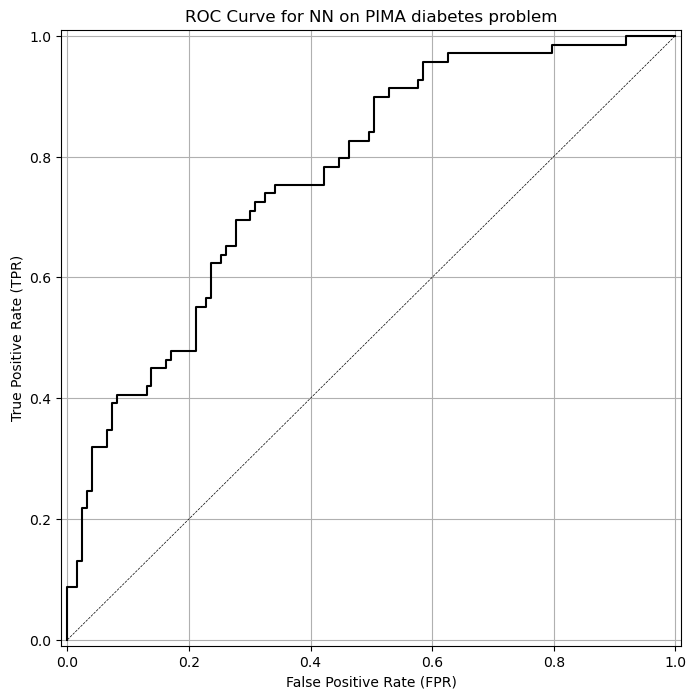

In [53]:
def plot_roc(y_test, y_pred, model_name):
    fpr, tpr, thr = roc_curve(y_test, y_pred)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.plot(fpr, tpr, 'k-')
    ax.plot([0, 1], [0, 1], 'k--', linewidth=.5)  # roc curve for random model
    ax.grid(True)
    ax.set(title='ROC Curve for {} on PIMA diabetes problem'.format(model_name), xlim=[-0.01, 1.01], ylim=[-0.01, 1.01])
    ax.set_xlabel('False Positive Rate (FPR)')
    ax.set_ylabel('True Positive Rate (TPR)')

plot_roc(y_test, y_pred_prob_nn_1, 'NN')

plt.show() #without this graph is not visible

There may be some variation in exact numbers due to randomness, but you should get results in the same ballpark as the Random Forest - between 75% and 85% accuracy, between .8 and .9 for AUC.

Let's look at the `run_hist_1` object that was created, specifically its `history` attribute.


In [54]:
run_hist_1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [55]:
type(run_hist_1)

keras.callbacks.History

Let's plot the training loss and the validation loss over the different epochs and see how it looks.


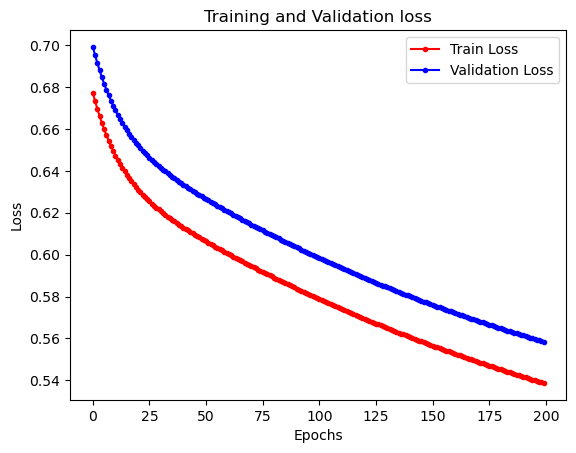

In [58]:
fig, ax = plt.subplots()
ax.plot(run_hist_1.history["loss"],'r', marker='.', label="Train Loss")
ax.plot(run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss")
ax.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation loss')
plt.show()

Looks like the losses are still going down on both the training set and the validation set.  This suggests that the model might benefit from further training.  Let's train the model a little more and see what happens. Note that it will pick up from where it left off. Train for 1000 more epochs.


In [59]:
## Note that when we call "fit" again, it picks up where it left off
run_hist_1b = model_1.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1000)

Epoch 1/1000
18/18 [==============================] - 0s 9ms/step - loss: 0.5385 - accuracy: 0.7240 - val_loss: 0.5582 - val_accuracy: 0.7344
Epoch 2/1000
18/18 [==============================] - 0s 6ms/step - loss: 0.5381 - accuracy: 0.7292 - val_loss: 0.5579 - val_accuracy: 0.7344
Epoch 3/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.5378 - accuracy: 0.7257 - val_loss: 0.5576 - val_accuracy: 0.7344
Epoch 4/1000
18/18 [==============================] - 0s 3ms/step - loss: 0.5375 - accuracy: 0.7257 - val_loss: 0.5573 - val_accuracy: 0.7344
Epoch 5/1000
18/18 [==============================] - 0s 4ms/step - loss: 0.5372 - accuracy: 0.7240 - val_loss: 0.5569 - val_accuracy: 0.7292
Epoch 6/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.5369 - accuracy: 0.7240 - val_loss: 0.5566 - val_accuracy: 0.7292
Epoch 7/1000
18/18 [==============================] - 0s 5ms/step - loss: 0.5365 - accuracy: 0.7257 - val_loss: 0.5563 - val_accuracy: 0.7292
Epoch 

In [63]:
n = len(run_hist_1.history["loss"])
m = len(run_hist_1b.history['loss'])
fig, ax = plt.subplots(figsize=(16, 8))

ax.plot(range(n), run_hist_1.history["loss"],'r', marker='.', label="Train Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["loss"], 'hotpink', marker='.', label="Train Loss - Run 2")

ax.plot(range(n), run_hist_1.history["val_loss"],'b', marker='.', label="Validation Loss - Run 1")
ax.plot(range(n, n+m), run_hist_1b.history["val_loss"], 'LightSkyBlue', marker='.',  label="Validation Loss - Run 2")

ax.legend()

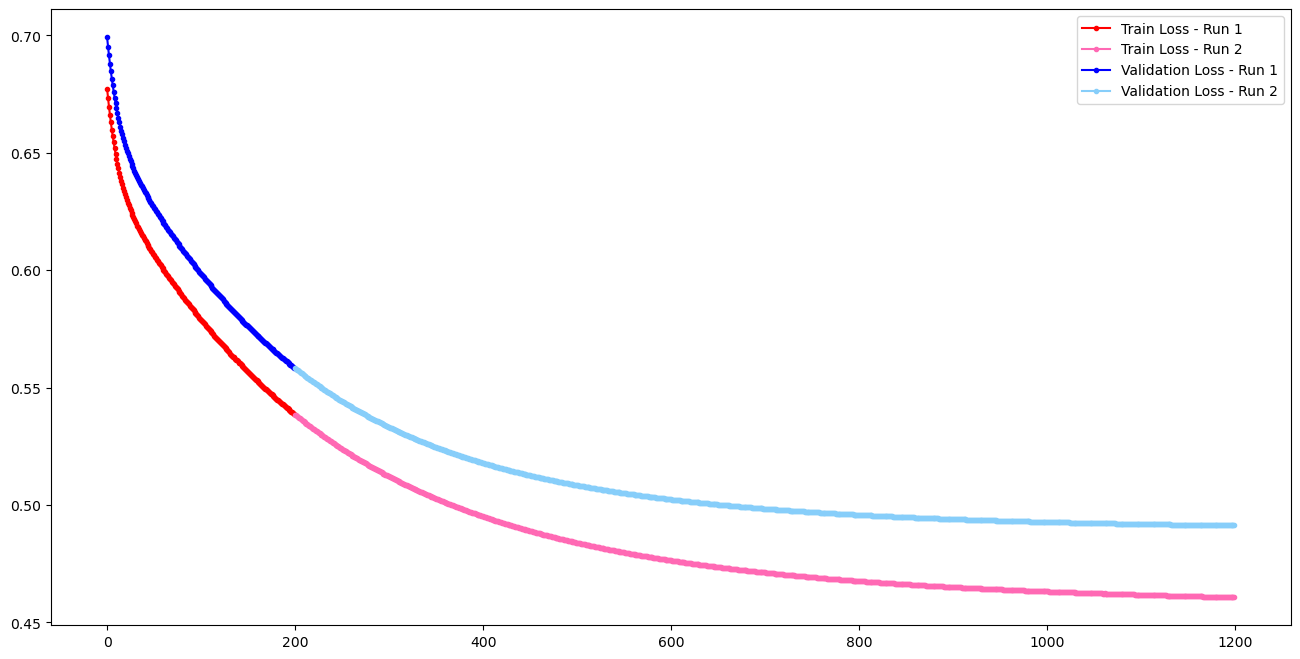

In [64]:
plt.show()

Note that this graph begins where the other left off.  While the training loss is still going down, it looks like the validation loss has stabilized (or even gotten worse!).  This suggests that our network will not benefit from further training.  What is the appropriate number of epochs?


## Exercise 2
For this exercise, do the following in the cells below:
- Build a model with two hidden layers, each with 6 nodes
- Use the "relu" activation function for the hidden layers, and "sigmoid" for the final layer
- Use a learning rate of .003 and train for 1500 epochs
- Graph the trajectory of the loss functions, accuracy on both train and test set
- Plot the roc curve for the predictions

Experiment with different learning rates, numbers of epochs, and network structures


In [67]:
model_2 = Sequential()
model_2.add(Dense(6, input_shape=(8,), activation="relu"))
model_2.add(Dense(6,  activation="relu"))
model_2.add(Dense(1, activation="sigmoid"))

model_2.compile(SGD(lr = .003), "binary_crossentropy", metrics=["accuracy"])
run_hist_2 = model_2.fit(X_train_norm, y_train, validation_data=(X_test_norm, y_test), epochs=1500)

Epoch 1/1500
18/18 [==============================] - 1s 14ms/step - loss: 0.8182 - accuracy: 0.6510 - val_loss: 0.8249 - val_accuracy: 0.6406
Epoch 2/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.8064 - accuracy: 0.6510 - val_loss: 0.8128 - val_accuracy: 0.6406
Epoch 3/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7958 - accuracy: 0.6528 - val_loss: 0.8020 - val_accuracy: 0.6406
Epoch 4/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7862 - accuracy: 0.6545 - val_loss: 0.7923 - val_accuracy: 0.6406
Epoch 5/1500
18/18 [==============================] - 0s 6ms/step - loss: 0.7778 - accuracy: 0.6545 - val_loss: 0.7834 - val_accuracy: 0.6406
Epoch 6/1500
18/18 [==============================] - 0s 5ms/step - loss: 0.7702 - accuracy: 0.6545 - val_loss: 0.7755 - val_accuracy: 0.6406
Epoch 7/1500
18/18 [==============================] - 0s 4ms/step - loss: 0.7634 - accuracy: 0.6545 - val_loss: 0.7682 - val_accuracy: 0.6406
Epoch

In [68]:
run_hist_2.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

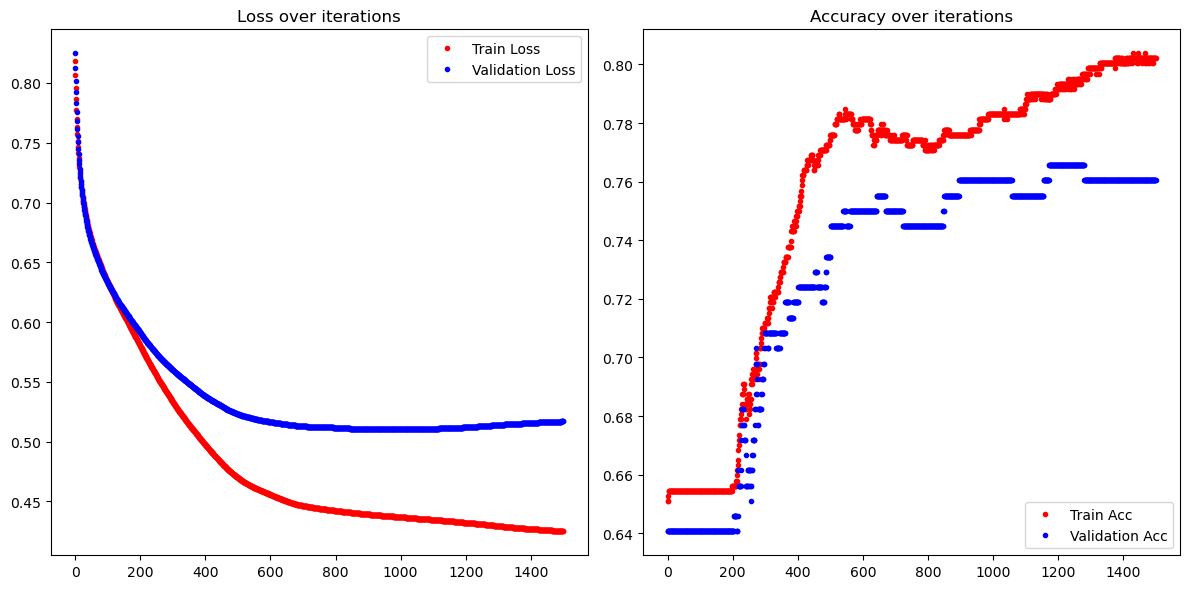

In [77]:
n = len(run_hist_2.history["loss"])

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(1, 2, 1)
ax.plot(range(n), (run_hist_2.history["loss"]),'r.', label="Train Loss")
ax.plot(range(n), (run_hist_2.history["val_loss"]),'b.', label="Validation Loss")
ax.legend()
ax.set_title('Loss over iterations')

ax = fig.add_subplot(1, 2, 2)
ax.plot(range(n), (run_hist_2.history["accuracy"]),'r.', label="Train Acc")
ax.plot(range(n), (run_hist_2.history["val_accuracy"]),'b.', label="Validation Acc")
ax.legend(loc='lower right')
ax.set_title('Accuracy over iterations')

plt.tight_layout()
plt.show()

6/6 [==============================] - 0s 2ms/step

accuracy is 0.760
roc-auc is 0.810


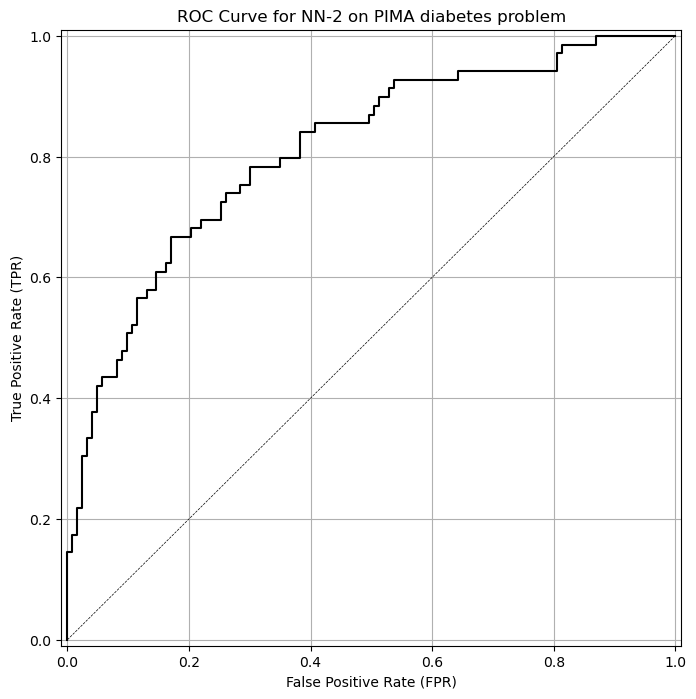

In [81]:
# y_pred_class_nn_2 = model_2.predict(X_test_norm)
y_pred_class_nn_2 = (model_2.predict(X_test_norm)>0.5).astype("int32")
y_pred_prob_nn_2 = model_2.predict(X_test_norm)
print('')
print('accuracy is {:.3f}'.format(accuracy_score(y_test,y_pred_class_nn_2)))
print('roc-auc is {:.3f}'.format(roc_auc_score(y_test,y_pred_prob_nn_2)))

plot_roc(y_test, y_pred_prob_nn_2, 'NN-2')
plt.show()

Once we get those outputs using the predicted class, as well as, the predicted probabilities, then we can also plot our ROC, using that function that we defined earlier. 

So, you run this and we see a bit higher of accuracy, a bit higher of ROCAUC and then we see the curve as well.

Now, again there's a bit of randomization, so we don't necessarily get the exact same answer. And maybe there's not that much improvement and especially with the amount of time it took to train this model, there probably wasn't enough improvement from our random forests. 

So keep that in mind that some sometimes it's not always going to be the best solution, there is this talk within the data science community, where you just throw neural nets at everything and how that's not best practice.

So, I want to ensure as you watch this video, that you keep that in mind as well, but they will be very powerful throughout and that's why we're learning it here.

---
### Machine Learning Foundation (C) 2020 IBM Corporation
